In [64]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import catboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from phik.report import plot_correlation_matrix
from lightgbm import LGBMClassifier, plot_importance

In [56]:
df = sns.load_dataset('penguins')
df.dropna(inplace=True)

In [57]:
num_classes = len(df['island'].unique())

In [58]:
X = df.drop('island', axis=1)
y = df['island']

In [59]:
X = pd.get_dummies(X)

In [60]:
X = X.replace(True, 1).replace(False, 0)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [67]:
boostings = ["gbdt", "dart", "goss"]
metr = []
for name in boostings:
    clf = LGBMClassifier(
        objective="multiclass",
        n_estimators=10,
        learning_rate=0.1,
        num_class=num_classes,
        reg_alpha=0.5,
        reg_lambda=0.3,
        seed=42,
        boosting_type=name,
    )
    clf.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
    )
    test_preds = clf.predict(X_test)
    metr.append([name, f1_score(y_test, test_preds, average='macro')])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 223, number of used features: 9
[LightGBM] [Info] Start training from score -0.725041
[LightGBM] [Info] Start training from score -0.988331
[LightGBM] [Info] Start training from score -1.941436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [68]:
metr

[['gbdt', 0.554345165238678],
 ['dart', 0.5166666666666667],
 ['goss', 0.554345165238678]]

https://github.com/a-milenkin/Competitive_Data_Science/blob/main/notebooks/4.2%20-%20LightGBM.ipynb

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

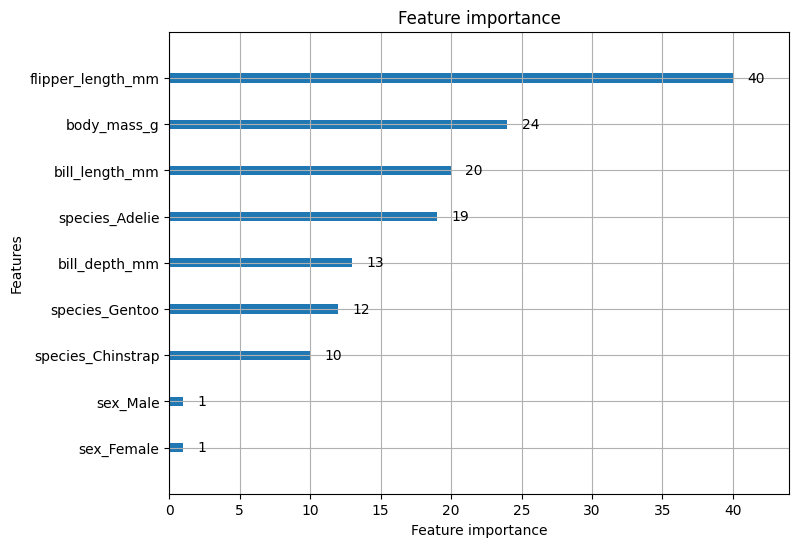

In [65]:
plot_importance(clf, figsize=(8, 6), importance_type="split")